In [3]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import cosima_cookbook as cc
import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
from scipy import stats

import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)
import matplotlib.gridspec as gridspec

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

session = cc.database.create_session()

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [4]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [5]:
input_path = '/g/data/e14/erd561/Australia_3/'

In [6]:
temp_ym32_1_mod = xr.open_dataset(input_path + 'temp_ym32_1_mod.nc').temp_ym32_1_mod
print(temp_ym32_1_mod)
temp_ym32_1_slope_mod = xr.open_dataset(input_path + 'temp_ym32_1_slope_mod.nc').temp_ym32_1_slope_mod*10
print(temp_ym32_1_slope_mod)
temp_ym32_1_p_value_mod = xr.open_dataset(input_path + 'temp_ym32_1_p_value_mod.nc').temp_ym32_1_p_value_mod
print(temp_ym32_1_p_value_mod)
temp_ym32_1_std_err_mod = xr.open_dataset(input_path + 'temp_ym32_1_std_err_mod.nc').temp_ym32_1_std_err_mod*10
print(temp_ym32_1_std_err_mod)

temp_ym32_025_mod = xr.open_dataset(input_path + 'temp_ym32_025_mod.nc').temp_ym32_025_mod
print(temp_ym32_025_mod)
temp_ym32_025_slope_mod = xr.open_dataset(input_path + 'temp_ym32_025_slope_mod.nc').temp_ym32_025_slope_mod*10
print(temp_ym32_025_slope_mod)
temp_ym32_025_p_value_mod = xr.open_dataset(input_path + 'temp_ym32_025_p_value_mod.nc').temp_ym32_025_p_value_mod
print(temp_ym32_025_p_value_mod)
temp_ym32_025_std_err_mod = xr.open_dataset(input_path + 'temp_ym32_025_std_err_mod.nc').temp_ym32_025_std_err_mod*10
print(temp_ym32_025_std_err_mod)

temp_ym32_01_mod = xr.open_dataset(input_path + 'temp_ym32_01_mod.nc').temp_ym32_01_mod
print(temp_ym32_01_mod)
temp_ym32_01_slope_mod = xr.open_dataset(input_path + 'temp_ym32_01_slope_mod.nc').temp_ym32_01_slope_mod*10
print(temp_ym32_01_slope_mod)
temp_ym32_01_p_value_mod = xr.open_dataset(input_path + 'temp_ym32_01_p_value_mod.nc').temp_ym32_01_p_value_mod
print(temp_ym32_01_p_value_mod)
temp_ym32_01_std_err_mod = xr.open_dataset(input_path + 'temp_ym32_01_std_err_mod.nc').temp_ym32_01_std_err_mod*10
print(temp_ym32_01_std_err_mod)

<xarray.DataArray 'temp_ym32_1_mod' (st_ocean: 34, xt_ocean: 32, year: 14)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [19.181178, 19.112267, ..., 19.415679, 19.463907],
        [19.092463, 19.008066, ..., 19.366858, 19.416054]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [19.169761, 19.096033, ..., 19.394841, 19.445812],
        [19.081472, 18.992504, ..., 19.346661, 19.397867]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [ 2.533976,  2.478867, ...,  2.647884,  2.620616],
        [ 2.493476,  2.461614, ...,  2.5854  ,  2.568663]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [ 2.134955,  2.0868

In [7]:
temp_ym32_obs = xr.open_dataset(input_path + 'temp_ym32_obs.nc').temp_ym32_obs
print(temp_ym32_obs)
temp_ym32_slope_obs = xr.open_dataset(input_path + 'temp_ym32_slope_obs.nc').temp_ym32_slope_obs*10
print(temp_ym32_slope_obs)
temp_ym32_p_value_obs = xr.open_dataset(input_path + 'temp_ym32_p_value_obs.nc').temp_ym32_p_value_obs
print(temp_ym32_p_value_obs)
temp_ym32_std_err_obs = xr.open_dataset(input_path + 'temp_ym32_std_err_obs.nc').temp_ym32_std_err_obs*10
print(temp_ym32_std_err_obs)

temp_ym32_1_obs = xr.open_dataset(input_path + 'temp_ym32_1_obs.nc').temp_ym32_1_obs
print(temp_ym32_1_obs)
temp_ym32_1_slope_obs = xr.open_dataset(input_path + 'temp_ym32_1_slope_obs.nc').temp_ym32_1_slope_obs*10
print(temp_ym32_1_slope_obs)
temp_ym32_1_p_value_obs = xr.open_dataset(input_path + 'temp_ym32_1_p_value_obs.nc').temp_ym32_1_p_value_obs
print(temp_ym32_1_p_value_obs)
temp_ym32_1_std_err_obs = xr.open_dataset(input_path + 'temp_ym32_1_std_err_obs.nc').temp_ym32_1_std_err_obs*10
print(temp_ym32_1_std_err_obs)

temp_ym32_025_obs = xr.open_dataset(input_path + 'temp_ym32_025_obs.nc').temp_ym32_025_obs
print(temp_ym32_025_obs)
temp_ym32_025_slope_obs = xr.open_dataset(input_path + 'temp_ym32_025_slope_obs.nc').temp_ym32_025_slope_obs*10
print(temp_ym32_025_slope_obs)
temp_ym32_025_p_value_obs = xr.open_dataset(input_path + 'temp_ym32_025_p_value_obs.nc').temp_ym32_025_p_value_obs
print(temp_ym32_025_p_value_obs)
temp_ym32_025_std_err_obs = xr.open_dataset(input_path + 'temp_ym32_025_std_err_obs.nc').temp_ym32_025_std_err_obs*10
print(temp_ym32_025_std_err_obs)

temp_ym32_01_obs = xr.open_dataset(input_path + 'temp_ym32_01_obs.nc').temp_ym32_01_obs
print(temp_ym32_01_obs)
temp_ym32_01_slope_obs = xr.open_dataset(input_path + 'temp_ym32_01_slope_obs.nc').temp_ym32_01_slope_obs*10
print(temp_ym32_01_slope_obs)
temp_ym32_01_p_value_obs = xr.open_dataset(input_path + 'temp_ym32_01_p_value_obs.nc').temp_ym32_01_p_value_obs
print(temp_ym32_01_p_value_obs)
temp_ym32_01_std_err_obs = xr.open_dataset(input_path + 'temp_ym32_01_std_err_obs.nc').temp_ym32_01_std_err_obs*10
print(temp_ym32_01_std_err_obs)

<xarray.DataArray 'temp_ym32_obs' (depth: 58, lon: 32, year: 14)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [19.330332, 19.376749, ..., 19.878416, 19.781916],
        [19.228249, 19.242167, ..., 19.762   , 19.764334]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [19.298082, 19.342916, ..., 19.840416, 19.736916],
        [19.19525 , 19.207666, ..., 19.72525 , 19.695833]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [ 2.490083,  2.493083, ...,  2.506083,  2.491833],
        [ 2.4905  ,  2.492584, ...,  2.506917,  2.4895  ]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [ 2.421667,  2.426333, ...,  

<xarray.DataArray 'temp_ym32_01_obs' (depth_01: 54, lon_01: 320, year: 14)>
[241920 values with dtype=float64]
Coordinates:
  * depth_01  (depth_01) float64 -0.5413 -1.681 -2.94 ... -1.716e+03 -1.858e+03
  * lon_01    (lon_01) float64 150.1 150.2 150.3 150.4 ... 181.8 181.9 182.0
  * year      (year) int64 2004 2005 2006 2007 2008 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'temp_ym32_01_slope_obs' (depth_01: 54, lon_01: 320)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * depth_01  (depth_01) float64 -0.5413 -1.681 -2.94 ... -1.716e+03 -1.858e+03
  * lon_01    (lon_01) float64 150.1 150.2 150.3 150.4 ... 181.8 181.9 182.0
<xarray.DataArray 'temp_ym32_01_p_value_obs' (depth_01: 54, lon_01: 320)>
array([[nan, nan, nan, ..., nan, nan, nan],
 

Bbox(x0=0.125, y0=0.5368181818181819, x1=0.29347826086956524, y1=0.88)
[0.125, 0.5268181818181819, 0.31097826086956526, 0.86]
Bbox(x0=0.3271739130434783, y0=0.5368181818181819, x1=0.4956521739130435, y1=0.88)
[0.3271739130434783, 0.5268181818181819, 0.5131521739130435, 0.86]
Bbox(x0=0.5293478260869566, y0=0.5368181818181819, x1=0.6978260869565218, y1=0.88)
[0.5293478260869566, 0.5268181818181819, 0.7153260869565218, 0.86]
Bbox(x0=0.7315217391304348, y0=0.5368181818181819, x1=0.9000000000000001, y1=0.88)
[0.7315217391304348, 0.5268181818181819, 0.9175000000000001, 0.86]
Bbox(x0=0.125, y0=0.1250000000000001, x1=0.29347826086956524, y1=0.46818181818181825)
[0.125, 0.1250000000000001, 0.31097826086956526, 0.45818181818181825]
Bbox(x0=0.3271739130434783, y0=0.1250000000000001, x1=0.4956521739130435, y1=0.46818181818181825)
[0.3271739130434783, 0.1250000000000001, 0.5131521739130435, 0.45818181818181825]
Bbox(x0=0.5293478260869566, y0=0.1250000000000001, x1=0.6978260869565218, y1=0.468181818

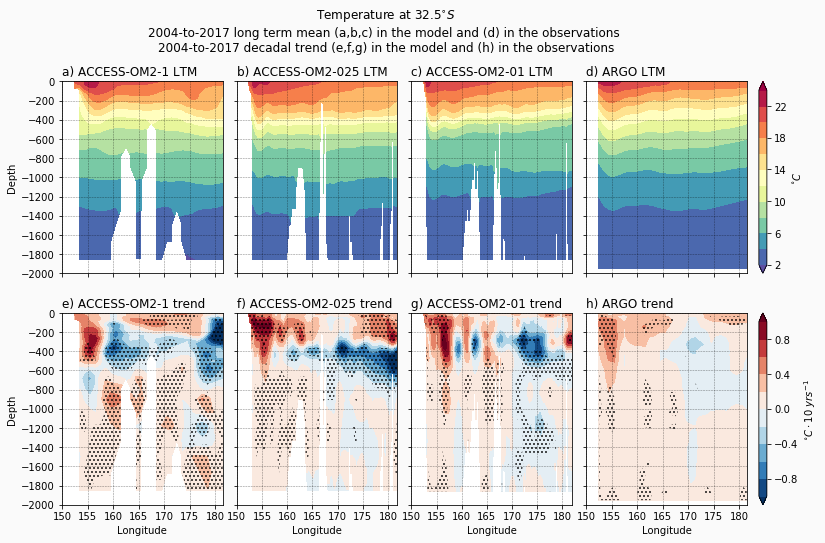

In [26]:
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")

# fig = plt.figure(1, figsize=(8,12), facecolor=[0.98,0.98,0.98]) 
fig = plt.figure(1, figsize=(12,8), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'Temperature at $32.5^{\circ}S$ ' +
    '\n2004-to-2017 long term mean (a,b,c) in the model and ' +
    '(d) in the observations ' +
    '\n2004-to-2017 decadal trend (e,f,g) in the model and ' +
    '(h) in the observations',
    x=0.5,y=0.99, ha='center')

row=2
col=4

ax = plt.subplot(row, col, 1)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.01, pos.x1+0.0175, pos.y1-0.02] 
print(pos_plot)
levels=arange(2,24,2)
cmap = plt.cm.Spectral_r
data = temp_ym32_1_mod.mean('year')
plot = plt.contourf(data.xt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('a) ACCESS-OM2-1 LTM', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 180, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('Depth')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 2)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.01, pos.x1+0.0175, pos.y1-0.02] 
print(pos_plot)
# levels=arange(0,30,2)
cmap = plt.cm.Spectral_r
data = temp_ym32_025_mod.mean('year')
plot = plt.contourf(data.xt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('b) ACCESS-OM2-025 LTM', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 180, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 3)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.01, pos.x1+0.0175, pos.y1-0.02] 
print(pos_plot)
# levels=arange(0,30,2)
cmap = plt.cm.Spectral_r
data = temp_ym32_01_mod.mean('year')
plot = plt.contourf(data.xt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('c) ACCESS-OM2-01 LTM', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 180, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 4)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.01, pos.x1+0.0175, pos.y1-0.02] 
print(pos_plot)
# levels=arange(0,30,2)
cmap = plt.cm.Spectral_r
data = temp_ym32_obs.mean('year')
plot = plt.contourf(data.lon, data.depth, data,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('d) ARGO LTM', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 180, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$^{\circ}C$', cax=axins)


ax = plt.subplot(row, col, 5)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1-0.01] 
print(pos_plot)
levels=arange(-1,1,0.2)
cmap = plt.cm.RdBu_r
data = temp_ym32_1_slope_mod
plot = plt.contourf(data.xt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_ym32_1_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('e) ACCESS-OM2-1 trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 180, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Depth')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')

ax = plt.subplot(row, col, 6)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1-0.01] 
print(pos_plot)
# levels=arange(-1,1,0.2)
cmap = plt.cm.RdBu_r
data = temp_ym32_025_slope_mod
plot = plt.contourf(data.xt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_ym32_025_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('f) ACCESS-OM2-025 trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 180, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')

ax = plt.subplot(row, col, 7)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1-0.01] 
print(pos_plot)
# levels=arange(-1,1,0.2)
cmap = plt.cm.RdBu_r
data = temp_ym32_01_slope_mod
plot = plt.contourf(data.xt_ocean, data.st_ocean, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_ym32_01_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('g) ACCESS-OM2-01 trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 180, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')

ax = plt.subplot(row, col, 8)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1-0.01] 
print(pos_plot)
# levels=arange(-1,1,0.2)
cmap = plt.cm.RdBu_r
data = temp_ym32_slope_obs
plot = plt.contourf(data.lon, data.depth, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_ym32_p_value_obs
plot2 = plt.contourf(data.lon, data.depth, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('h) ARGO trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 180, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$^{\circ}C \cdot 10\ yrs^{-1}$', cax=axins)

savefigure('temp_ym32_absolute')

Bbox(x0=0.125, y0=0.5368181818181819, x1=0.29347826086956524, y1=0.88)
[0.125, 0.5268181818181819, 0.31097826086956526, 0.86]
Bbox(x0=0.3271739130434783, y0=0.5368181818181819, x1=0.4956521739130435, y1=0.88)
[0.3271739130434783, 0.5268181818181819, 0.5131521739130435, 0.86]
Bbox(x0=0.5293478260869566, y0=0.5368181818181819, x1=0.6978260869565218, y1=0.88)
[0.5293478260869566, 0.5268181818181819, 0.7153260869565218, 0.86]
Bbox(x0=0.7315217391304348, y0=0.5368181818181819, x1=0.9000000000000001, y1=0.88)
[0.8215217391304348, 0.5268181818181819, 1.0075, 0.86]
Bbox(x0=0.125, y0=0.1250000000000001, x1=0.29347826086956524, y1=0.46818181818181825)
[0.125, 0.1250000000000001, 0.31097826086956526, 0.45818181818181825]
Bbox(x0=0.3271739130434783, y0=0.1250000000000001, x1=0.4956521739130435, y1=0.46818181818181825)
[0.3271739130434783, 0.1250000000000001, 0.5131521739130435, 0.45818181818181825]
Bbox(x0=0.5293478260869566, y0=0.1250000000000001, x1=0.6978260869565218, y1=0.46818181818181825)
[0

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/ipykernel_launcher.py:168: RuntimeWarning: invalid value encountered in less
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/ipykernel_launcher.py:198: RuntimeWarning: invalid value encountered in less
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/ipykernel_launcher.py:228: RuntimeWarning: invalid value encountered in less


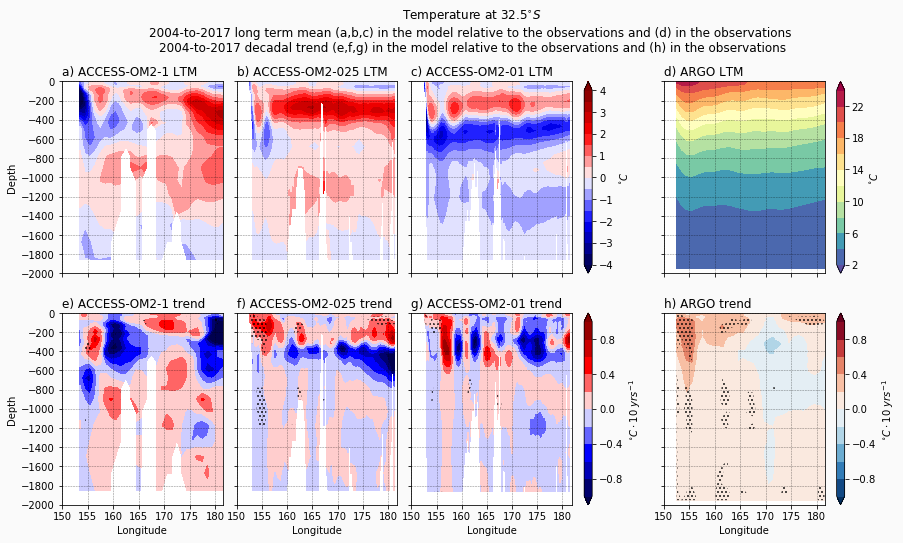

In [27]:
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")

# fig = plt.figure(1, figsize=(8,12), facecolor=[0.98,0.98,0.98]) 
fig = plt.figure(1, figsize=(12,8), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'Temperature at $32.5^{\circ}S$ ' +
    '\n2004-to-2017 long term mean (a,b,c) in the model relative to the observations and ' +
    '(d) in the observations ' +
    '\n2004-to-2017 decadal trend (e,f,g) in the model relative to the observations and ' +
    '(h) in the observations',
    x=0.6,y=0.99, ha='center')

row=2
col=4

ax = plt.subplot(row, col, 1)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.01, pos.x1+0.0175, pos.y1-0.02] 
print(pos_plot)
levels=arange(-4,4,0.5)
cmap = plt.cm.seismic
data = temp_ym32_1_mod.mean('year')
data_values = temp_ym32_1_mod.mean('year').values - temp_ym32_1_obs.mean('year').values
plot = plt.contourf(data.xt_ocean, data.st_ocean, data_values,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('a) ACCESS-OM2-1 LTM', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 180, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('Depth')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 2)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.01, pos.x1+0.0175, pos.y1-0.02] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral_r
data = temp_ym32_025_mod.mean('year')
data_values = temp_ym32_025_mod.mean('year').values - temp_ym32_025_obs.mean('year').values
plot = plt.contourf(data.xt_ocean, data.st_ocean, data_values,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('b) ACCESS-OM2-025 LTM', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 180, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')


ax = plt.subplot(row, col, 3)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0-0.01, pos.x1+0.0175, pos.y1-0.02] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral_r
data = temp_ym32_01_mod.mean('year')
data_values = temp_ym32_01_mod.mean('year').values - temp_ym32_01_obs.mean('year').values
plot = plt.contourf(data.xt_ocean, data.st_ocean, data_values,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('c) ACCESS-OM2-01 LTM', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 180, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$^{\circ}C$', cax=axins)


ax = plt.subplot(row, col, 4)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0-0.01, pos.x1+0.1075, pos.y1-0.02] 
print(pos_plot)
levels=arange(2,24,2)
cmap = plt.cm.Spectral_r
data = temp_ym32_obs.mean('year')
plot = plt.contourf(data.lon, data.depth, data,
            cmap=cmap, levels=levels, extend='both')
ax.set_position(bbox(pos_plot))
ax.set_title('d) ARGO LTM', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 180, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$^{\circ}C$', cax=axins)


ax = plt.subplot(row, col, 5)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1-0.01] 
print(pos_plot)
levels=arange(-1,1,0.2)
cmap = plt.cm.seismic
data = temp_ym32_1_slope_mod
data_values = temp_ym32_1_slope_mod.values - temp_ym32_1_slope_obs.values
plot = plt.contourf(data.xt_ocean, data.st_ocean, data_values,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_ym32_1_p_value_mod.where(temp_ym32_1_p_value_obs.values<0.05,1)
plot2 = plt.contourf(data.xt_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('e) ACCESS-OM2-1 trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 180, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Depth')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')

ax = plt.subplot(row, col, 6)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1-0.01] 
print(pos_plot)
# levels=arange(-1,1,0.2)
# cmap = plt.cm.RdBu_r
data = temp_ym32_025_slope_mod
data_values = temp_ym32_025_slope_mod.values - temp_ym32_025_slope_obs.values
plot = plt.contourf(data.xt_ocean, data.st_ocean, data_values,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_ym32_025_p_value_mod.where(temp_ym32_025_p_value_obs.values<0.05,1)
plot2 = plt.contourf(data.xt_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('f) ACCESS-OM2-025 trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 180, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')

ax = plt.subplot(row, col, 7)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1-0.01] 
print(pos_plot)
# levels=arange(-1,1,0.2)
# cmap = plt.cm.RdBu_r
data = temp_ym32_01_slope_mod
data_values = temp_ym32_01_slope_mod.values - temp_ym32_01_slope_obs.values
plot = plt.contourf(data.xt_ocean, data.st_ocean, data_values,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_ym32_01_p_value_mod.where(temp_ym32_01_p_value_obs.values<0.05,1)
plot2 = plt.contourf(data.xt_ocean, data.st_ocean, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('g) ACCESS-OM2-01 trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 180, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$^{\circ}C \cdot 10\ yrs^{-1}$', cax=axins)

ax = plt.subplot(row, col, 8)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0, pos.x1+0.1075, pos.y1-0.01] 
print(pos_plot)
levels=arange(-1,1,0.2)
cmap = plt.cm.RdBu_r
data = temp_ym32_slope_obs
plot = plt.contourf(data.lon, data.depth, data,
            cmap=cmap, levels=levels, extend='both')
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_ym32_p_value_obs
plot2 = plt.contourf(data.lon, data.depth, data2, hatches=['...'],
            colors='none', levels=levels2)
ax.set_position(bbox(pos_plot))
ax.set_title('h) ARGO trend', loc='left')
# ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(150, 180, 5))
ax.set_yticks(arange(-2000, 0, 200))
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'$^{\circ}C \cdot 10\ yrs^{-1}$', cax=axins)

savefigure('temp_ym32_relative')